In [8]:
# generate.py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

"""
train_vae.py
Full VAE training script for 64x64 anime faces.
Assumes images are in ./dataset/images/ (flat folder).
Saves:
  - checkpoints/decoder.h5
  - checkpoints/encoder.h5
  - checkpoints/vae_epoch_{epoch}.h5 (optional)
  - samples/sample_epoch_{epoch}.png
"""

import os
import math
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model

# --------- Config ----------
DATA_DIR = "Datasets/anim_images"       # change if needed
IMG_SIZE = 64
BATCH_SIZE = 128
LATENT_DIM = 128
EPOCHS = 30
CHECKPOINT_DIR = "checkpoints"
SAMPLES_DIR = "samples"
AUTOTUNE = tf.data.AUTOTUNE
# --------------------------

os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(SAMPLES_DIR, exist_ok=True)

# --------- Utility: load file paths ----------
def list_image_files(folder):
    exts = (".jpg", ".jpeg", ".png", ".bmp")
    paths = []
    for fname in os.listdir(folder):
        if fname.lower().endswith(exts):
            paths.append(os.path.join(folder, fname))
    return paths

image_paths = list_image_files(DATA_DIR)
print(f"Found {len(image_paths)} images in {DATA_DIR}")
if len(image_paths) == 0:
    raise SystemExit("No images found. Put your images in dataset/images/")

# --------- tf.data pipeline ----------
def decode_and_resize(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image

path_ds = tf.data.Dataset.from_tensor_slices(image_paths)
img_ds = path_ds.map(decode_and_resize, num_parallel_calls=AUTOTUNE)
dataset = img_ds.shuffle(buffer_size=10000).batch(BATCH_SIZE).prefetch(AUTOTUNE)


for image in dataset:
    print(image.shape)


Found 21551 images in Datasets/anim_images
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
(128,

In [13]:

# =====================Load the model and do a prediction ==========================================
CHECKPOINT_DIR = "checkpoints"
LATENT_DIM = 128
NUM_SAMPLES = 9

# load decoder (compile=False avoids requiring the training settings)
decoder = tf.keras.models.load_model(os.path.join(CHECKPOINT_DIR, "decoder.h5"), compile=False)
image_iter = iter(dataset)
image = next(image_iter)
img1 = image[0]

# prediction for a batch of data:
generated = decoder.predict(image)
# show images in grid
rows = int(np.sqrt(NUM_SAMPLES))
fig, axs = plt.subplots(rows, rows, figsize=(rows*2, rows*2))
idx = 0
for r in range(rows):
    for c in range(rows):
        axs[r,c].imshow(generated[idx])
        axs[r,c].axis("off")
        idx += 1

plt.tight_layout()
plt.show()



ValueError: Input 0 of layer "decoder" is incompatible with the layer: expected shape=(None, 128), found shape=(32, 64, 64, 3)

In [14]:
z = np.random.normal(size=(NUM_SAMPLES, LATENT_DIM))
z.shape

(9, 128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


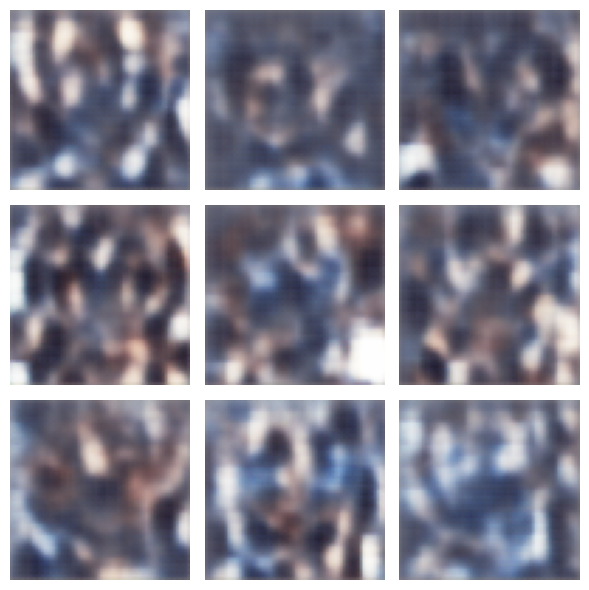

Saved generated_grid.png


<Figure size 640x480 with 0 Axes>

In [4]:

# =====================Load the model and do a prediction ==========================================
CHECKPOINT_DIR = "checkpoints"
LATENT_DIM = 128
NUM_SAMPLES = 9

# load decoder (compile=False avoids requiring the training settings)
decoder = tf.keras.models.load_model(os.path.join(CHECKPOINT_DIR, "decoder.h5"), compile=False)

z = np.random.normal(size=(NUM_SAMPLES, LATENT_DIM))
generated = decoder.predict(z)

# show images in grid
rows = int(np.sqrt(NUM_SAMPLES))
fig, axs = plt.subplots(rows, rows, figsize=(rows*2, rows*2))
idx = 0
for r in range(rows):
    for c in range(rows):
        axs[r,c].imshow(generated[idx])
        axs[r,c].axis("off")
        idx += 1

plt.tight_layout()
plt.show()

# optionally save to a file
plt.savefig("generated_grid.png")
print("Saved generated_grid.png")
